In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, tukey_hsd
import numpy as np
import statsmodels.api as sm
from scipy import stats

## I. Data Preprocessing

In [2]:
# Creating pandas dataframe of the Spotify dataset.
spotify_df = pd.read_csv('dataset.csv')
spotify_df = spotify_df.drop(columns='Unnamed: 0')
spotify_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Let's learn more about the data! How many samples, features, data types, etc...

In [4]:
print('Number of samples:', spotify_df.shape[0])
print('Number of features:', spotify_df.shape[1])

print(f'Category Data Types:\n{spotify_df.dtypes}')

# Creating a list with all category names.
categories = spotify_df.columns.tolist()[1:]
print("Categories:", categories)

Number of samples: 114000
Number of features: 20
Category Data Types:
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object
Categories: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


Now let's look if there are any missing values!

In [5]:
missing_data = spotify_df.isna().sum()
print(missing_data)

# Saving missing values as dictionary as missing values for each category.
missing_data = missing_data.to_dict()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
# Just making sure the count is the same for each column
spotify_df.count()

track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
dtype: int64

Looks like there is 1 missing value each in the artists, album_name, and track_name categories. Since <br> the proportion of missing data is <5% we can use Listwise Deletion to get rid of the missing values.

In [7]:
# Dropping the row with NA values in the dataframe.
spotify_df = spotify_df.dropna()

Now check for duplicate values in the dataset.

In [8]:
duplicates = spotify_df[spotify_df.duplicated()]
len(duplicates)

450

Looks like there are 450 rows with exact duplicates in the dataset that need to be removed.

In [9]:
spotify_df['track_id'].duplicated(keep=False).sum()

np.int64(40900)

In [10]:
duplicated_ids = spotify_df['track_id'].value_counts()
duplicated_ids = duplicated_ids[duplicated_ids > 1]
duplicated_ids

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
                         ..
2K6jJQ1i2SVNWLEF06Ha4B    2
0hjpo40L9XPirSdaJZOGB2    2
40XeGNGFchGYw7y0ue1GiG    2
50xwQXPtfNZFKFeZ0XePWc    2
6NDoBIaqTHdcudaR8RDJNw    2
Name: count, Length: 16641, dtype: int64

Digging further it can be seen that there are 16,641 tracks that are listed multiple times in the dataset since they fall under multiple genres. This information can come in handy later during model creation.

In [11]:
# Removing the exact duplicates from the dataset
spotify_df = spotify_df.drop_duplicates()
spotify_df.duplicated().sum()

np.int64(0)

The category, track_genre, is currently a string (object) describing what the genre of the particular song is. <br> We need to convert this to numeric values through feature encoding for our model to use later on.

In [12]:
# Checking cardinality to see what type of encoding would best fit this scenario.
print(spotify_df['track_genre'].nunique())

114


Since this category has a high cardinality, one hot encoding would create too many new columns. <br> Let's try using frequency encoding here to convert this column.

In [13]:
freq_encoding = spotify_df['track_genre'].value_counts()
spotify_df['track_genre_freq'] = spotify_df['track_genre'].map(freq_encoding)
spotify_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,999
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,999
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,999
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,999


In [14]:
spotify_df['track_genre_freq'].unique()

array([1000,  999,  997,  998,  933,  995,  996,  965,  993,  963,  991,
        981,  988,  990,  994,  992,  904])

Looks like frequency encoding might not be the best option since looks the frequency of the genres are 999 or 1000 which loses much of the uniqueness and information we are looking for from this category. Another good option for encoding when there is high cardinality is Target/Mean Encoding, let's try that!

In [15]:
genre_popularity_map = spotify_df.groupby('track_genre')['popularity'].mean()
spotify_df['track_genre_target_enc'] = spotify_df['track_genre'].map(genre_popularity_map)
print('No. Unique Values: ', spotify_df['track_genre_target_enc'].nunique())
spotify_df

No. Unique Values:  113


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000,42.483000
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000,42.483000
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000,42.483000
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000,42.483000
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000,42.483000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,999,41.880881
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,999,41.880881
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,999,41.880881
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,999,41.880881


## II. Exploratory Data Analysis

### 🎯 Q1: Correlations
We will start our analysis by determining how each feature is related to each other. To do this, we will create a plot of the correlations between each numerical feature. 

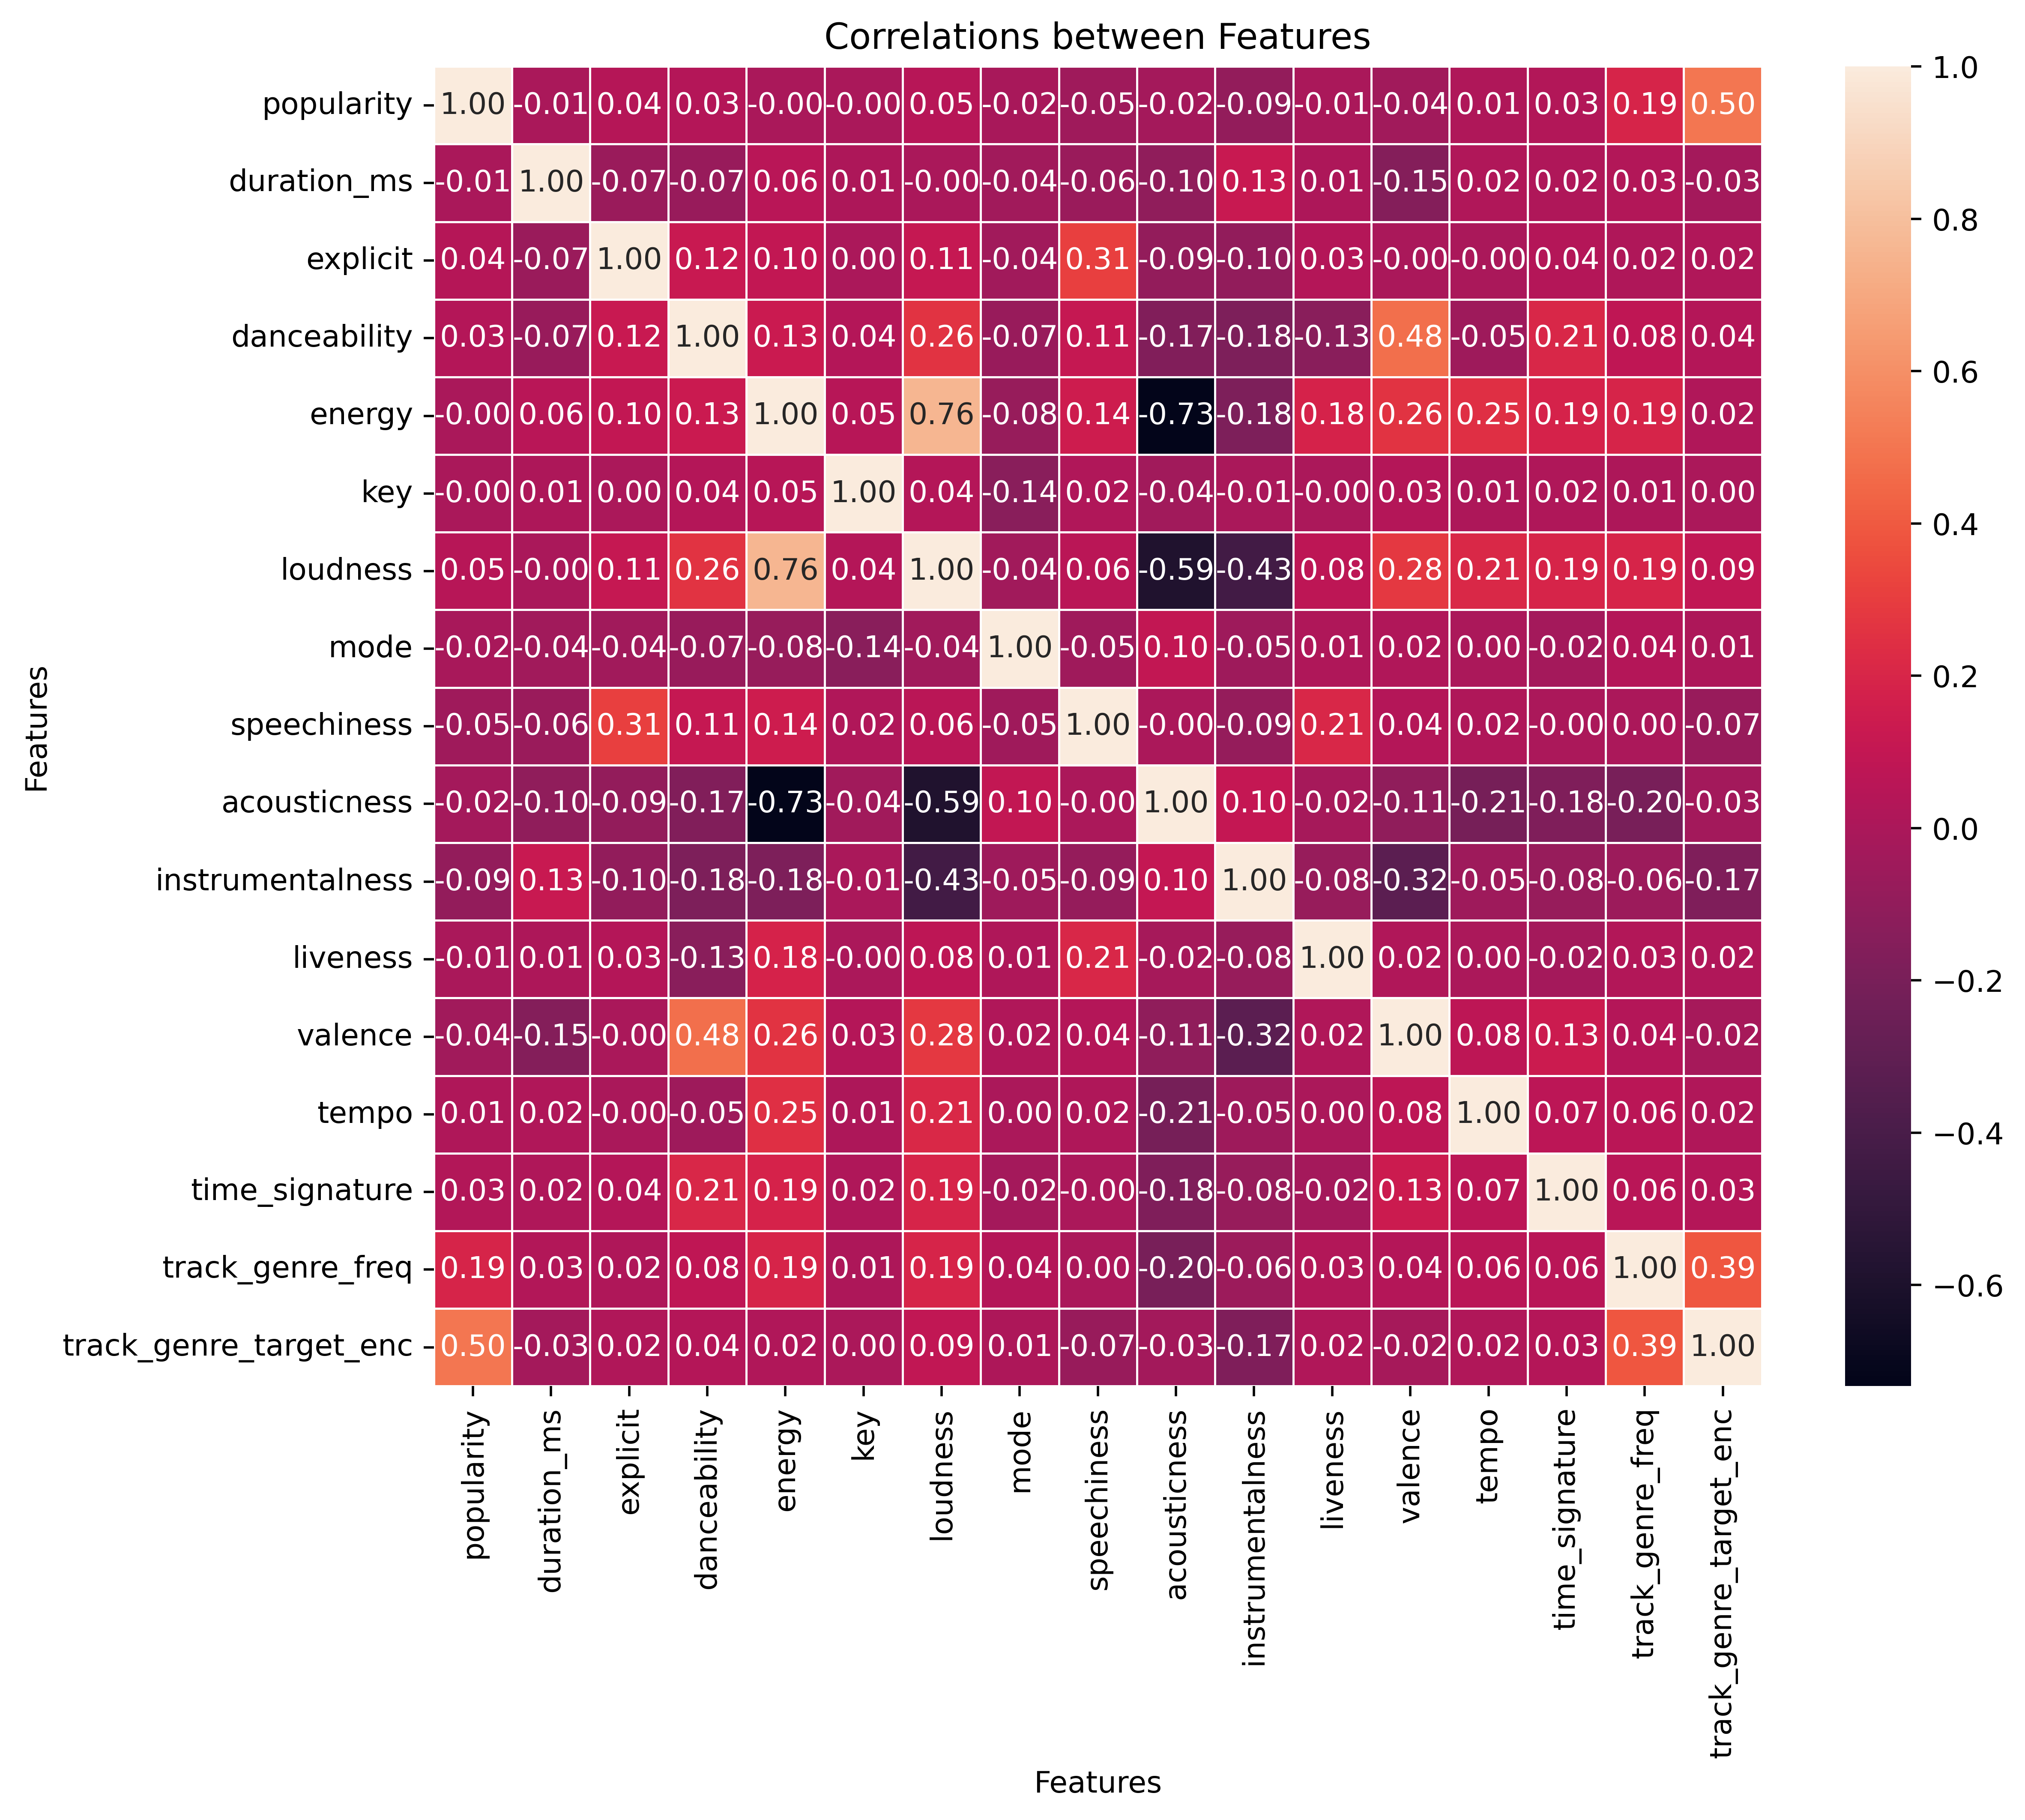

In [16]:
#Credit: https://www.geeksforgeeks.org/data-analysis/exploring-correlation-in-python/

corr = spotify_df.corr(method = 'pearson', numeric_only= True)
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
ax = sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
ax.set_xlabel("Features")
ax.set_ylabel("Features")
plt.show()

We can see from the above plot that some features are more correlated, such as acousticness and energy, as well as acousticness and loudness. However, most features are not highly correlated. This is easier to see when we plot the absolute value of the correlation.

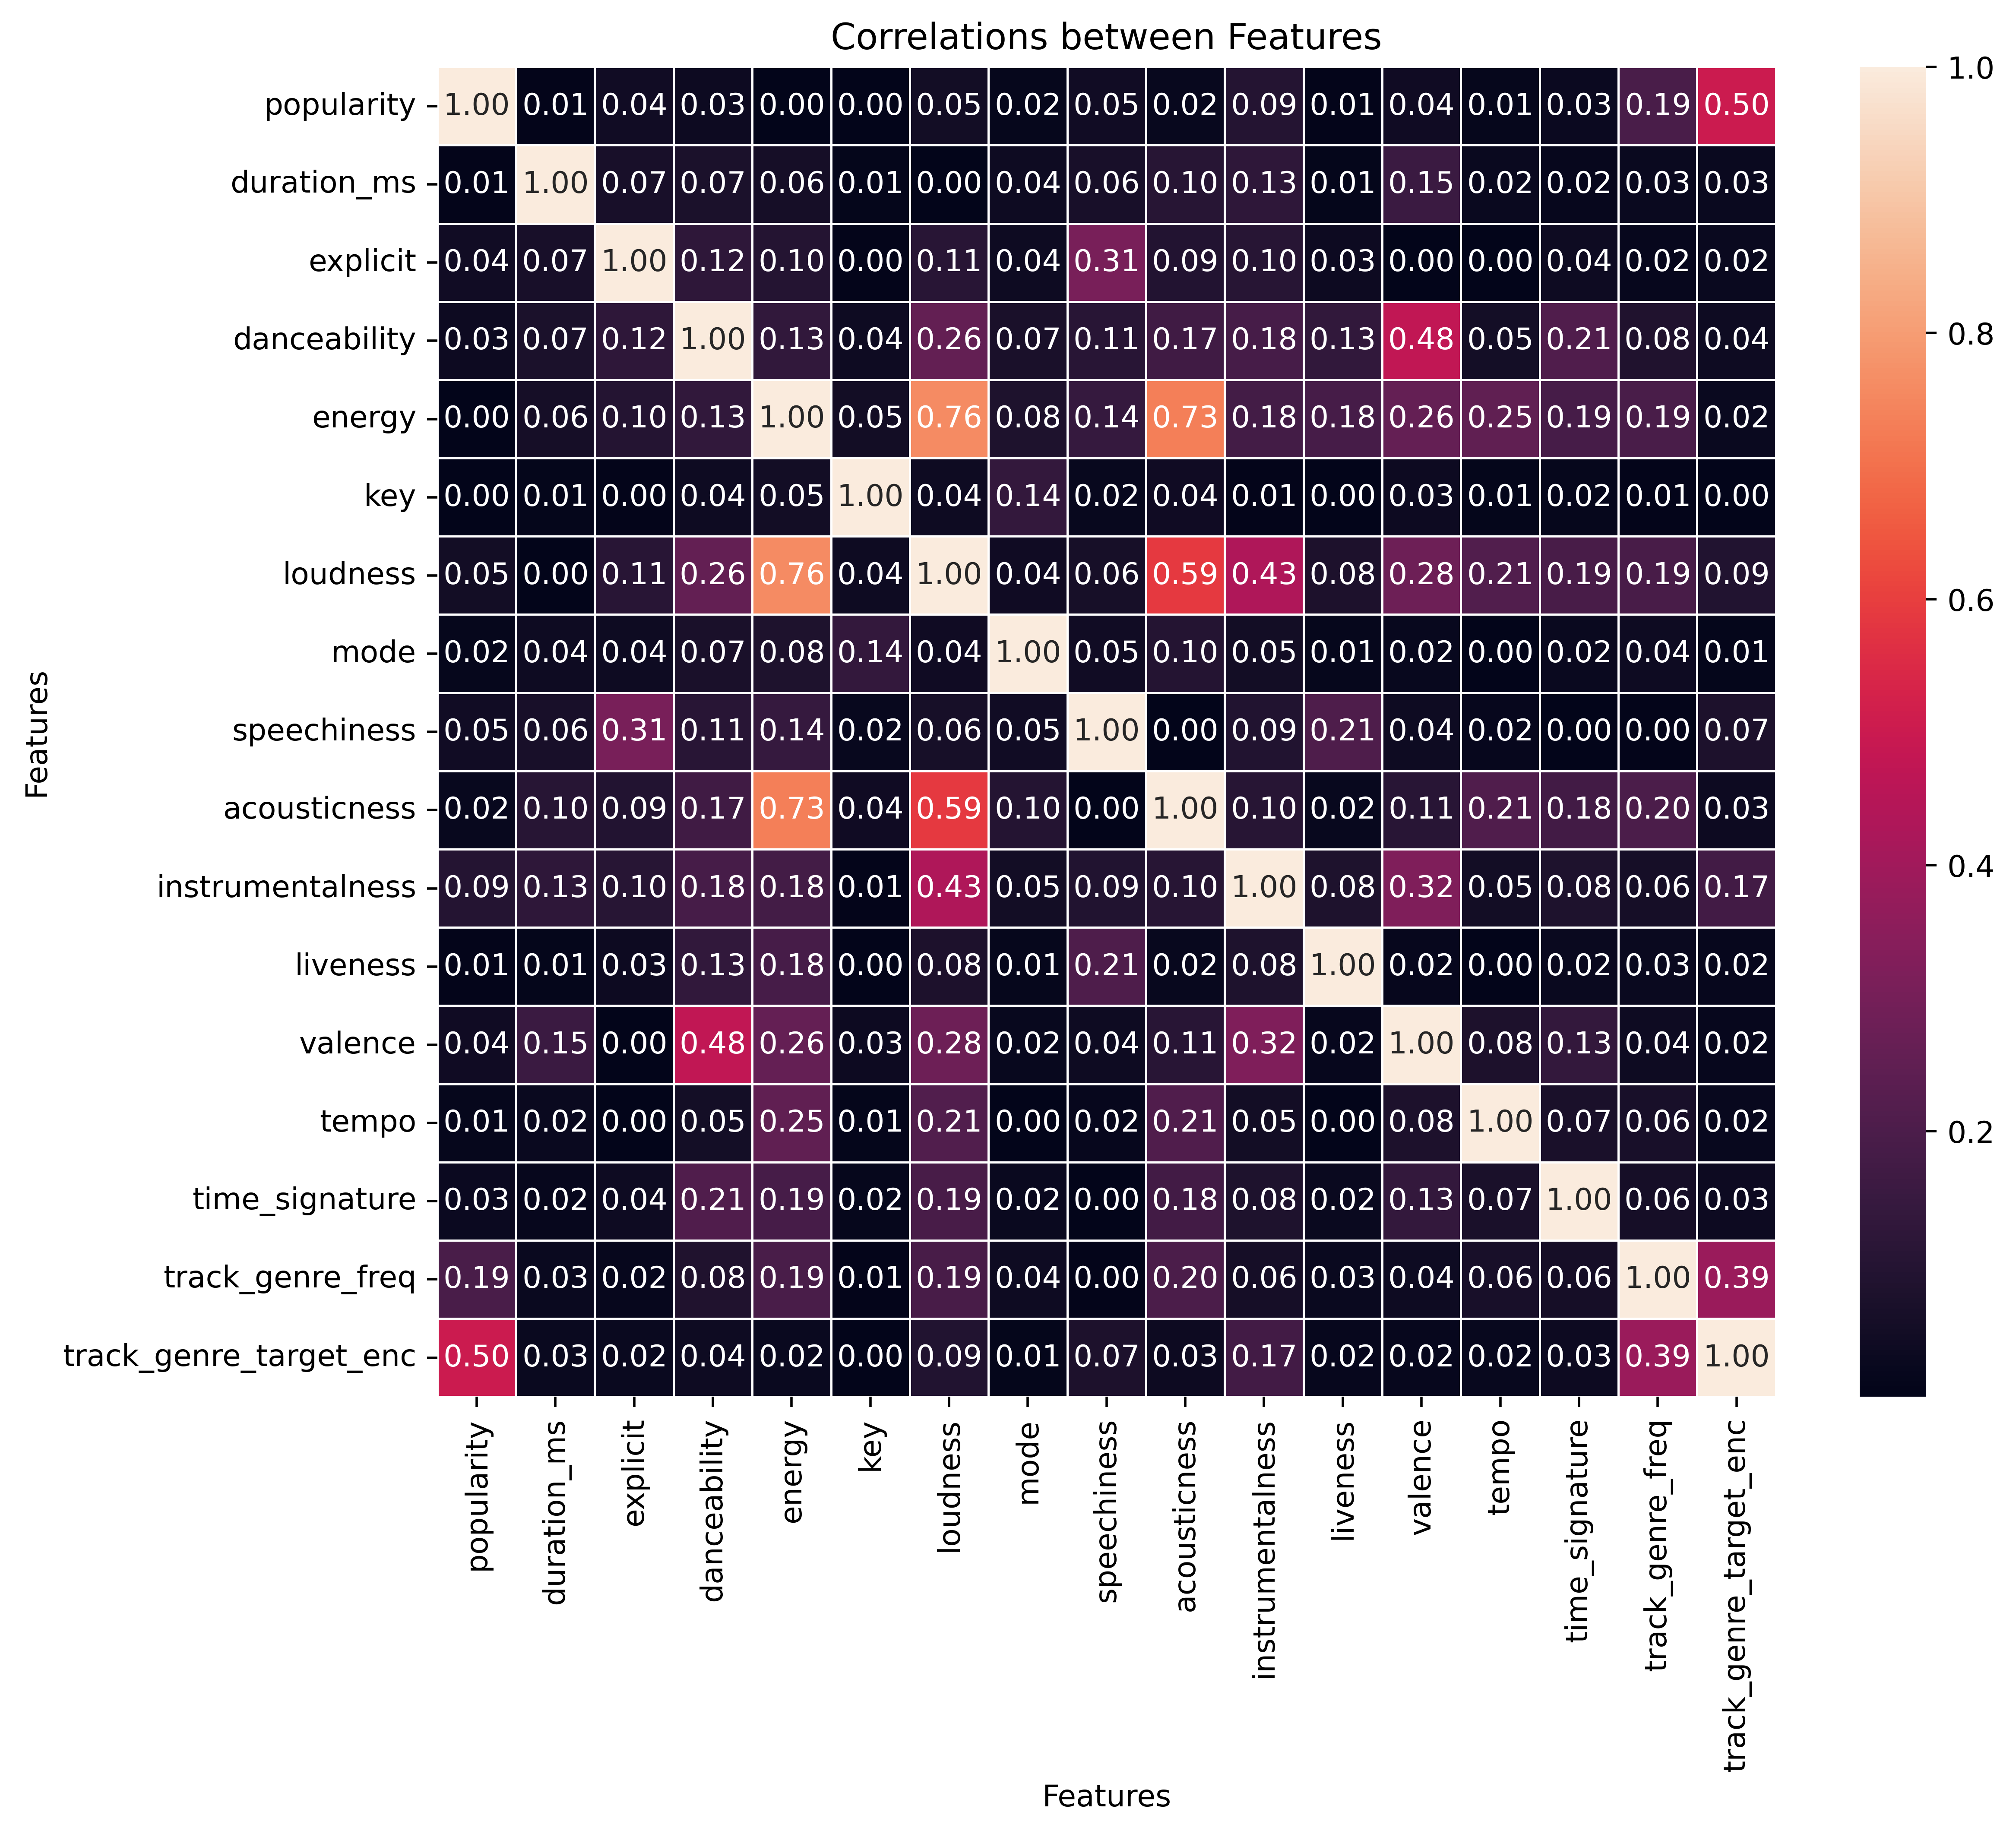

In [17]:
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
ax = sns.heatmap(corr.abs(),annot=True,fmt=".2f", linewidth=.5)
ax.set_xlabel("Features")
ax.set_ylabel("Features")
plt.show()

Most of the pairs of features have absolute correlation less than 0.1. To expand on this, let's find out which features are most correlated to which.

In [18]:
pairs = list()
for column in corr.columns:
    related_feature = corr[column].abs().sort_values(ascending= False).iloc[[1]].index.array[0]
    pairs.append([column, related_feature])
    print(column, " is most correlated with ", related_feature)

popularity  is most correlated with  track_genre_target_enc
duration_ms  is most correlated with  valence
explicit  is most correlated with  speechiness
danceability  is most correlated with  valence
energy  is most correlated with  loudness
key  is most correlated with  mode
loudness  is most correlated with  energy
mode  is most correlated with  key
speechiness  is most correlated with  explicit
acousticness  is most correlated with  energy
instrumentalness  is most correlated with  loudness
liveness  is most correlated with  speechiness
valence  is most correlated with  danceability
tempo  is most correlated with  energy
time_signature  is most correlated with  danceability
track_genre_freq  is most correlated with  track_genre_target_enc
track_genre_target_enc  is most correlated with  popularity


Some interesting points come from this: 
- the duration of a song tends to be longer when the valence ("musical positiveness") is lower,
- in contrast the danceability tends to be higher when the valence is higher,
- energy (intensity) is highly correlated with loudness and acousticness,
- the tempo tends to be faster when the energy is higher.

Above all however, is that popularity is not highly correlated with any feature except for potentially track genre.

### 🎯 Q2: Is popularity related to genre/key?
🔬 Statistical Method: One-way ANOVA (Analysis of Variance)

In [19]:
# Create a list of popularity scores per genre
genre_groups = [group['popularity'].values for name, group in spotify_df.groupby('track_genre')]

F = f_oneway(*genre_groups)
print("P-Value received from the ANOVA-testing", F.pvalue)

P-Value received from the ANOVA-testing 0.0


This p-value tells us that there is there is strong evidence that at *least one genre* has a different mean popularity compared to the others since it is <0.05

From doing the ANOVA test, we can only learn that there is a significant difference between the means of the groups included. Now to find out which one of these groups differ, we must do a Post Hoc Test such as Tukey's Honest Significant Difference (HSD). Here I will do the HSD test on the 10 most popular genre's since doing this test on 114 genres will become overwhelming.

In [20]:
# Find top 10 genres by mean popularity
top_10_popular_genres = (
    spotify_df.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter dataframe
df_top10 = spotify_df[spotify_df['track_genre'].isin(top_10_popular_genres)]

In [21]:
# Convert popularity values into a list per genre
groups = [df_top10[df_top10['track_genre'] == genre]['popularity'].values
          for genre in top_10_popular_genres]

# Run Tukey HSD
res = tukey_hsd(*groups)

We are going to make the result of the HSD into a pandas dataframe to make it easier to view.

In [22]:
genre_list = list(top_10_popular_genres)

comparisons = []
for (i, j), stat in np.ndenumerate(res.statistic):
    if i < j:
        comparisons.append({
            'Genre A': genre_list[i],
            'Genre B': genre_list[j],
            'Mean Diff': stat,
            'p-value': res.pvalue[i, j],
            'Lower CI': res.confidence_interval().low[i, j],
            'Upper CI': res.confidence_interval().high[i, j],
            'Significant': res.pvalue[i, j] < 0.05
        })

# Convert to DataFrame
tukey_df = pd.DataFrame(comparisons)

In [23]:
tukey_df =  tukey_df.sort_values(by='p-value')
tukey_df

,Genre A,Genre B,Mean Diff,p-value,Lower CI,Upper CI,Significant
22,chill,pop,5.801381,0.000000e+00,3.418556,8.184207,True
23,chill,sertanejo,5.838705,0.000000e+00,3.460066,8.217344,True
16,k-pop,sertanejo,9.097928,0.000000e+00,6.718693,11.477163,True
15,k-pop,pop,9.060605,0.000000e+00,6.677184,11.444025,True
14,k-pop,emo,8.835928,0.000000e+00,6.456693,11.215163,True
12,k-pop,indian,7.435399,0.000000e+00,5.055569,9.815229,True
11,k-pop,grunge,7.381345,0.000000e+00,5.001515,9.761175,True
8,pop-film,sertanejo,11.414280,0.000000e+00,9.035641,13.792919,True
13,k-pop,anime,8.197161,0.000000e+00,5.817331,10.576991,True
6,pop-film,emo,11.152280,0.000000e+00,8.773641,13.530919,True


From this result of the HSD test and it's table, you can see that the categories **pop-film, film, and chill** were the majority of the *significant difference* when comparisons where made between genres. This suggests that pop-film, k-pop, and chill are are significantly more popular than emo, anime, indian, grunge, sertanejo, sad, and pop as the **conclusion**.

Below I've plotted the Top 10 Most Popular Genres to show that this relationship found can also be seen from a simple averaging of popularity scores on the track_genres.

/var/folders/tv/89ds0n_563nfsn6bpr8c6fv00000gn/T/ipykernel_35710/3331727488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette="viridis")


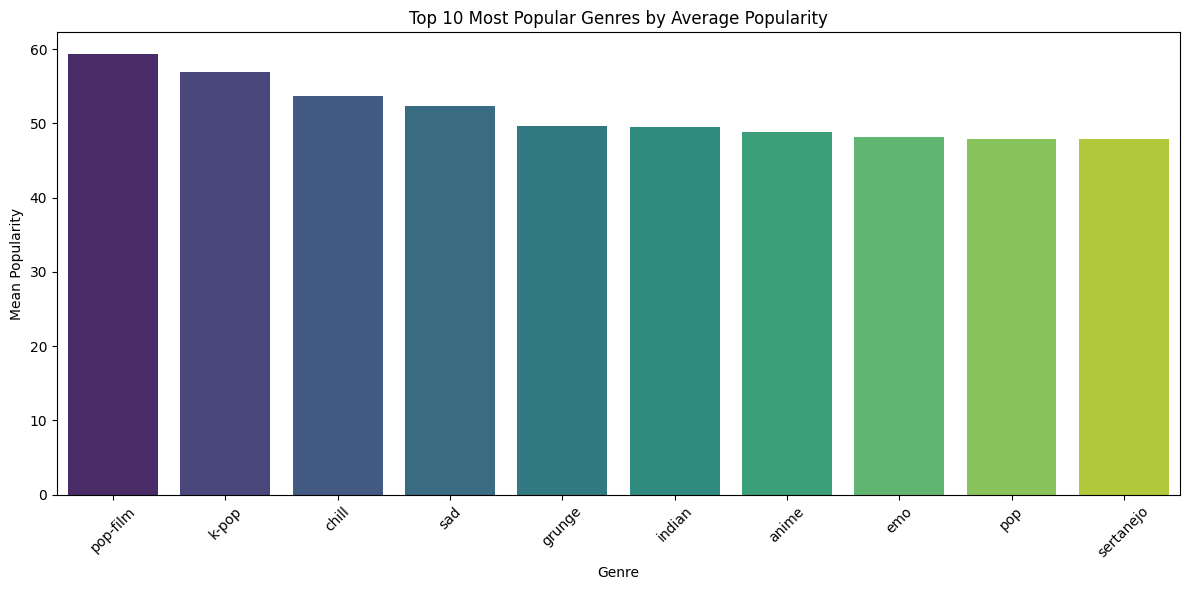

In [24]:
# Compute mean popularity
mean_popularity = df_top10.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette="viridis")
plt.title('Top 10 Most Popular Genres by Average Popularity')
plt.ylabel('Mean Popularity')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🎯 Q3: Are songs in a major key more popular than songs in a minor key? How about explicit vs non-explicit?

Let's separate the songs between those that are in major vs minor key.

In [25]:
songs_in_minor_keys = spotify_df[spotify_df["mode"] == 0]
songs_in_major_keys = spotify_df[spotify_df["mode"] == 1]

In [26]:
songs_in_minor_keys.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1000,42.483
12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712,False,0.489,0.3140,7,...,0.0331,0.7490,0.000000,0.1130,0.607,124.234,4,acoustic,1000,42.483
17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,False,0.795,0.0841,10,...,0.0461,0.7420,0.000012,0.0853,0.609,91.803,4,acoustic,1000,42.483
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.6670,5,...,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic,1000,42.483
25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,1,302346,False,0.755,0.4540,9,...,0.0352,0.7570,0.000000,0.2360,0.330,120.060,4,acoustic,1000,42.483


In [27]:
songs_in_major_keys.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.924,0.000006,0.1010,0.267,77.489,4,acoustic,1000,42.483
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic,1000,42.483
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.905,0.000071,0.1320,0.143,181.740,3,acoustic,1000,42.483
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.469,0.000000,0.0829,0.167,119.949,4,acoustic,1000,42.483
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,...,0.1050,0.289,0.000000,0.1890,0.666,98.017,4,acoustic,1000,42.483


Let's look at the distribution of the popularity of the songs in minor keys.

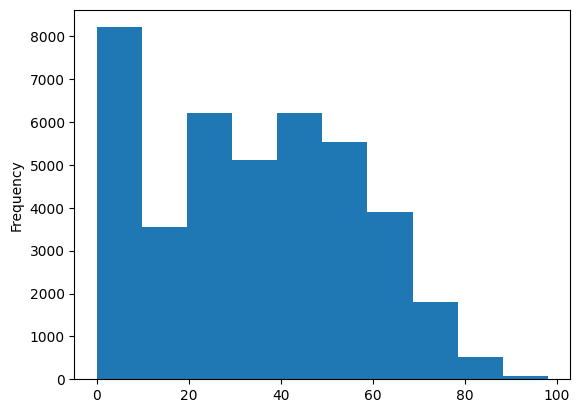

In [28]:
songs_in_minor_keys["popularity"].plot(kind = 'hist')
plt.show()

Let's look at the distribution of the popularity of the songs in major keys.

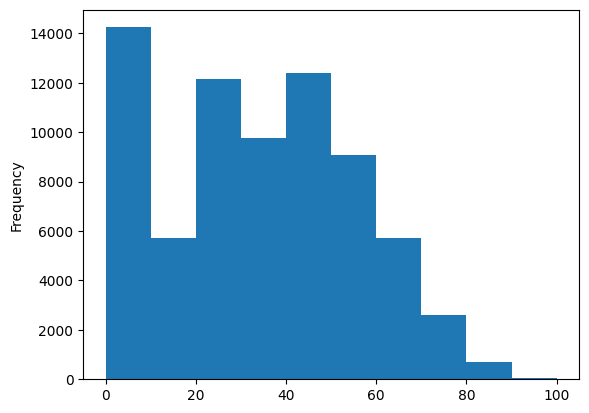

In [29]:
songs_in_major_keys["popularity"].plot(kind = 'hist')
plt.show()

These qqplots (Quantile-Quantile Plots) confirm that the distribution of the popularity for both major and minor key songs are not normal. If the distributions were normal, then the scatter would fit close to the line shown below, however, we can see some deviation on the ends of the theoretical quantiles, which suggests a more "dispersed" distribution. This aligns with what we see in the histograms. 

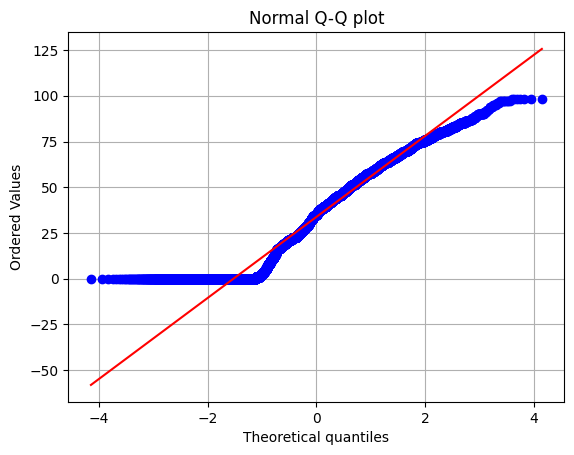

In [30]:
#Credit: https://www.geeksforgeeks.org/machine-learning/quantile-quantile-plots/

stats.probplot(songs_in_minor_keys['popularity'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

#fig = sm.qqplot(songs_in_minor_keys['popularity'], line='45')

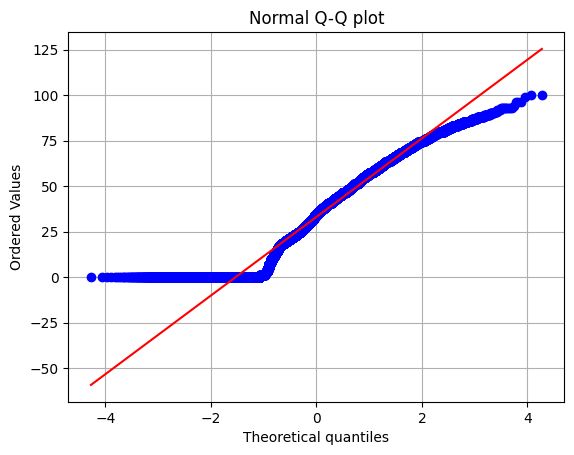

In [31]:
#Credit: https://www.geeksforgeeks.org/machine-learning/quantile-quantile-plots/

stats.probplot(songs_in_major_keys['popularity'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

#fig = sm.qqplot(songs_in_major_keys['popularity'], line='45')

Note that from the above results it is clear that these two populations are not normal. Hence we must use the Man Whiteny U test instead.
<br>
H_0: The popularity in major key and minor key come from the same distribution.
<br>
H_a: The popularity in major key and minor key come from the different distributions.

In [32]:
major_key_popularities = songs_in_major_keys["popularity"]
minor_key_popularities = songs_in_minor_keys["popularity"]
stat, p_val = stats.mannwhitneyu(major_key_popularities, minor_key_popularities)

In [33]:
print("The p-value is", p_val, ".")

The p-value is 1.593987121786141e-07 .


In [34]:
if p_val < 0.01:
        print("Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between the major key and minor keys.")
else:
        print("Fail to reject the null hypothesis: No statistically significant difference in the distribution of popularity between the two groups.")

Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between the major key and minor keys.


The above Man Whiteney U test suggests that there is sufficient evidence to reject the null hypothesis that the distributions of popularity between major and minor keys is the same. Instead, we conclude that the distributions must be different: thus the key likely has an influence on popularity.

In [35]:
float(major_key_popularities.mean())

33.0724295516989

In [36]:
float(minor_key_popularities.mean())

33.76831225680934

We see that the means from both distributions are quite similar, despite being from different distributions.

/var/folders/tv/89ds0n_563nfsn6bpr8c6fv00000gn/T/ipykernel_35710/3213480038.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(x=[group.values for name, group in grouped],


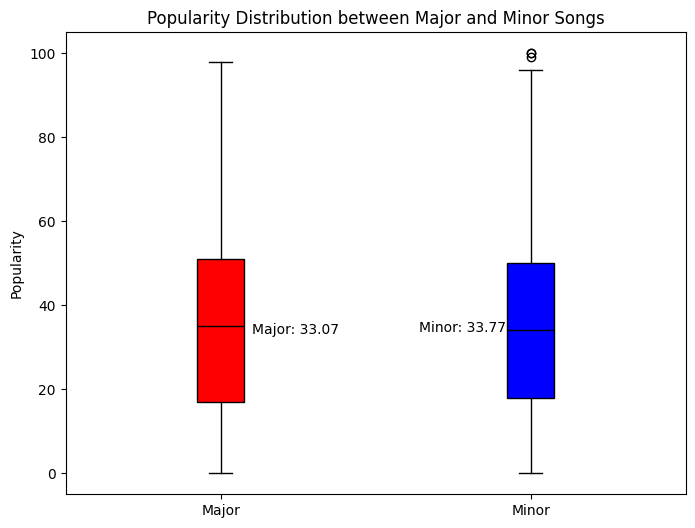

In [37]:
# Get the popularity means for explicit and nonexplicit songs
mean_major = major_key_popularities.mean()
mean_minor = minor_key_popularities.mean()

# Group songs by explicit/non-explicit status and show popularity
grouped = spotify_df.groupby('mode')['popularity']

###############################################################################
# BOXPLOT GRAPH
# Credit to: https://python-graph-gallery.com/551-student-t-test-visualization/

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=["Major", "Minor"],
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    )

# Define colors for each group
colors = ['red', 'blue']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Add the mean for each group
ax.text(1.1, mean_major, f'Major: {mean_major:.2f}')
ax.text(1.64, mean_minor, f'Minor: {mean_minor:.2f}')

# Add a title and axis label
ax.set_title('Popularity Distribution between Major and Minor Songs')
ax.set_ylabel('Popularity')

# Display it
plt.show()

### Now let's look at the difference in popularity between explicit and non-explicit songs.

In [38]:
explicit_songs = spotify_df[spotify_df["explicit"] == True]
non_explicit_songs = spotify_df[spotify_df["explicit"] == False]

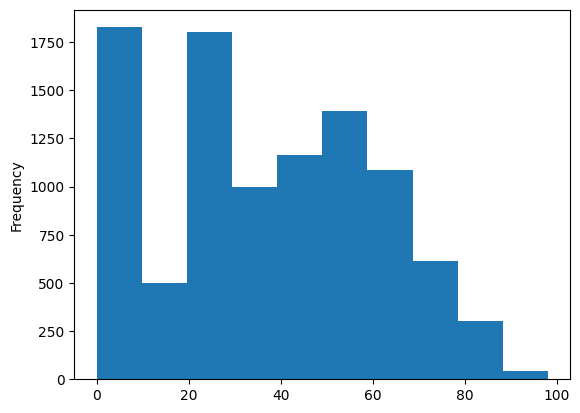

In [39]:
explicit_songs["popularity"].plot(kind = 'hist')
plt.show()

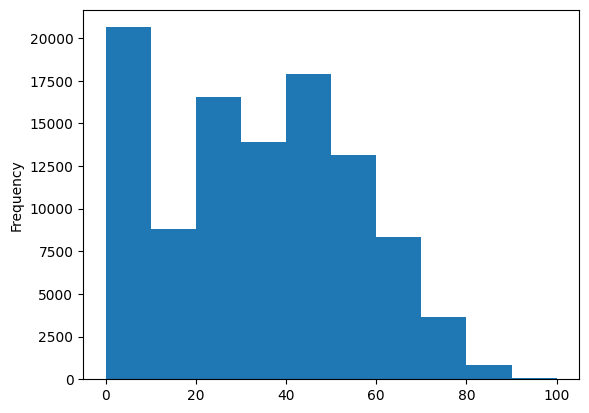

In [40]:
non_explicit_songs["popularity"].plot(kind = 'hist')
plt.show()

Similar to the major/minor popularity distributions, these do not have a normal bell-shape either. Let's look at the Q-Q Plots.

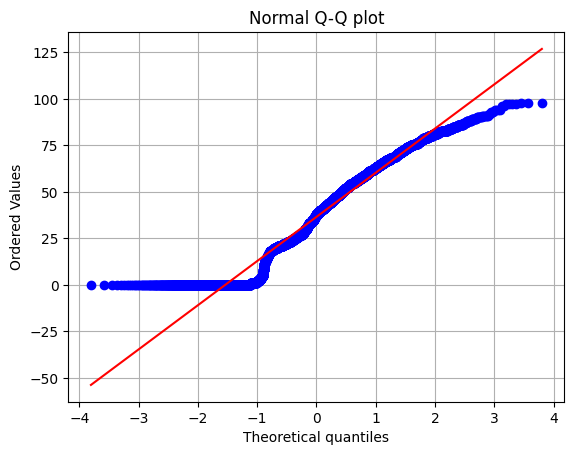

In [41]:
#Credit: https://www.geeksforgeeks.org/machine-learning/quantile-quantile-plots/

stats.probplot(explicit_songs['popularity'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

#explicit_songs_popularity_distr = sm.qqplot(explicit_songs['popularity'], line='45')

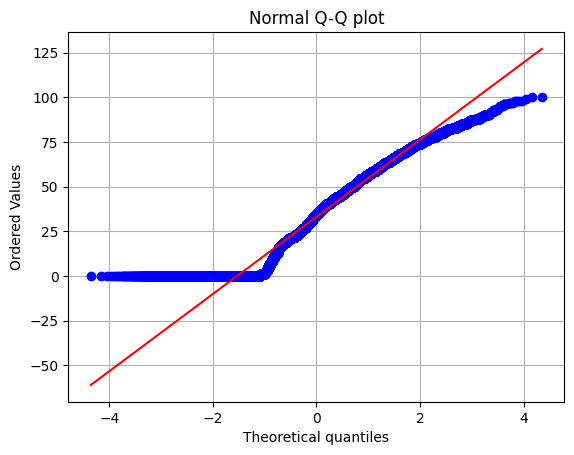

In [42]:
#Credit: https://www.geeksforgeeks.org/machine-learning/quantile-quantile-plots/

stats.probplot(non_explicit_songs['popularity'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

#nonexplicit_songs_popularity_dist = sm.qqplot(non_explicit_songs['popularity'], line='45')

Note that from the above results it is clear that these two populations are not normal. Hence we must use the Man Whiteny U test instead.
<br>
H_0: The popularity of explicit and non-explicit songs come from the same distribution.
<br>
H_a: The popularity of explicit and non-explicit songs come from different distributions.

In [43]:
explicit_song_popularities = explicit_songs["popularity"]
non_explicit_song_popularities = non_explicit_songs["popularity"]

In [44]:
stat_e, p_val_e = stats.mannwhitneyu(explicit_song_popularities, non_explicit_song_popularities)

In [45]:
print("The p-value is", p_val_e, ".")

The p-value is 1.3317030463864243e-41 .


In [46]:
if p_val_e < 0.01:
        print("Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between explicit songs and non-explicit songs.")
else:
        print("Fail to reject the null hypothesis: No statistically significant difference in the distribution of popularity between between explicit songs and non-explicit songs.")

Reject the null hypothesis: There is a statistically significant difference in the distribution of popularity between explicit songs and non-explicit songs.


/var/folders/tv/89ds0n_563nfsn6bpr8c6fv00000gn/T/ipykernel_35710/4160170839.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(x=[group.values for name, group in grouped],


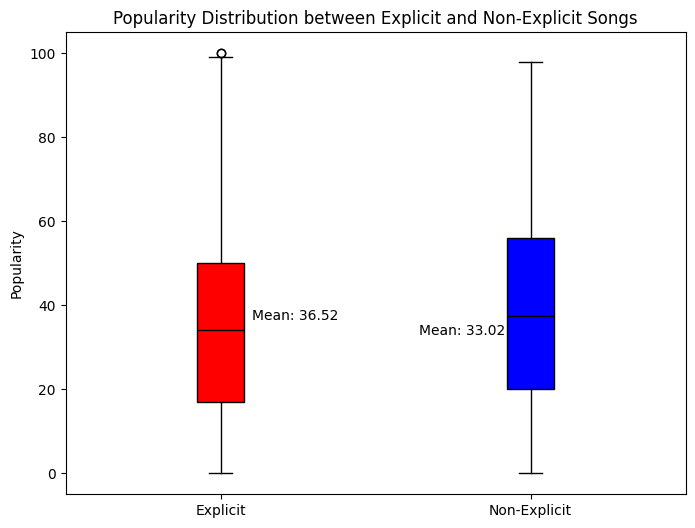

In [47]:
# Get the popularity means for explicit and nonexplicit songs
mean_explicit = explicit_song_popularities.mean()
mean_non_explicit = non_explicit_song_popularities.mean()

# Group songs by explicit/non-explicit status and show popularity
grouped = spotify_df.groupby('explicit')['popularity']

###############################################################################
# BOXPLOT GRAPH
# Credit to: https://python-graph-gallery.com/551-student-t-test-visualization/

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=["Explicit", "Non-Explicit"],
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    )

# Define colors for each group
colors = ['red', 'blue']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Add the mean for each group
ax.text(1.1, mean_explicit, f'Mean: {mean_explicit:.2f}')
ax.text(1.64, mean_non_explicit, f'Mean: {mean_non_explicit:.2f}')

# Add a title and axis label
ax.set_title('Popularity Distribution between Explicit and Non-Explicit Songs')
ax.set_ylabel('Popularity')

# Display it
plt.show()

### Neural Network Section

Credits: 
- HW4
- https://www.geeksforgeeks.org/deep-learning/how-to-implement-neural-networks-in-pytorch/
- https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- https://docs.pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.StepLR.html
- https://stackoverflow.com/questions/42966393/is-it-good-learning-rate-for-adam-method
- https://colab.research.google.com/drive/188oDAlTSCycppp_ijjLFuyVwsWYLh1Mm?usp=sharing#scrollTo=2vsxhmnqwBtd



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
artists_popularity_map = spotify_df.groupby('artists')['popularity'].mean()
spotify_df['artists_target_enc'] = spotify_df['artists'].map(artists_popularity_map)

#encode explicit as 1 or 0
spotify_df['explicit_enc'] = spotify_df['explicit'].map(lambda x: 1 if x else 0)

#drop non-numeric columns
X = spotify_df.drop(columns=['popularity', 'artists', 'track_id', 'album_name', 'track_name', 'explicit', 'track_genre', 'track_genre_freq'])
y = spotify_df['popularity']
display(X.head())
display(y.head())

display(X.dtypes)
display(y.dtypes)

#Convert type of data into floats
X = X.astype('float32')
y = y.astype('float32')

display(X.dtypes)
display(y.dtypes)

random_state= 42
#Credit: HW4
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train.values)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test.values)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_target_enc,artists_target_enc,explicit_enc
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,42.483,58.000000,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,42.483,42.923077,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,42.483,57.000000,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,42.483,53.933333,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,42.483,41.727273,0


0    73
1    55
2    57
3    71
4    82
Name: popularity, dtype: int64

duration_ms                 int64
danceability              float64
energy                    float64
key                         int64
loudness                  float64
mode                        int64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
time_signature              int64
track_genre_target_enc    float64
artists_target_enc        float64
explicit_enc                int64
dtype: object

dtype('int64')

duration_ms               float32
danceability              float32
energy                    float32
key                       float32
loudness                  float32
mode                      float32
speechiness               float32
acousticness              float32
instrumentalness          float32
liveness                  float32
valence                   float32
tempo                     float32
time_signature            float32
track_genre_target_enc    float32
artists_target_enc        float32
explicit_enc              float32
dtype: object

dtype('float32')

In [62]:
try:
    assert(type(train_loader) == DataLoader)
    assert(type(test_loader) == DataLoader)
except:
    print('"train_loader" and "test_loader" must be DataLoader type!')

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)

Batch Size: 128
Number of Train Data: 90880
Number of Test Data: 22784
Feature Dimension: 16


In [63]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [105]:
class NeuralNetwork(nn.Module):
    def __init__(self, feat_dim):
        super().__init__()
        ### 3-layer fully connected neural network.
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(feat_dim, 1024, dtype= torch.float32),
            nn.ReLU(),
            nn.Linear(1024, 512, dtype= torch.float32),
            nn.ReLU(),
            nn.Linear(512, 1, dtype= torch.float32),
            #nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

# Instantiate the model
model = NeuralNetwork(feat_dim=feat_dim).to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [106]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 5e-7)
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)

epochs = 100
avg_losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        optimizer.zero_grad()
        data, targets = data.to(device), targets.to(device)
        pred = model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        running_loss += loss.item() ** 0.5 #add MSE ** 0.5 for the batch

    #get the average loss of this epoch over every batch 
    #len(train_loader) is the number of iterations or batches in the epoch
    avg_losses.append(running_loss / len(train_loader))
    scheduler.step()

    print(f'Epoch {epoch+1}/{epochs}, Average MSE Loss in original units: {avg_losses[-1]}')

print('Finished Training')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Average MSE Loss in original units: 39.91226648113425
Epoch 2/100, Average MSE Loss in original units: 39.482230967814516
Epoch 3/100, Average MSE Loss in original units: 39.01062981341694
Epoch 4/100, Average MSE Loss in original units: 38.518474945459936
Epoch 5/100, Average MSE Loss in original units: 38.01388558557351
Epoch 6/100, Average MSE Loss in original units: 37.5265419983172
Epoch 7/100, Average MSE Loss in original units: 37.03324364136319
Epoch 8/100, Average MSE Loss in original units: 36.542319881811466
Epoch 9/100, Average MSE Loss in original units: 36.042209490722755
Epoch 10/100, Average MSE Loss in original units: 35.54168197209294
Epoch 11/100, Average MSE Loss in original units: 35.03539968929502
Epoch 12/100, Average MSE Loss in original units: 34.523145886095016
Epoch 13/100, Average MSE Loss in original units: 34.005216384755556
Epoch 14/100, Average MSE Loss in original units: 33.48214123193344
Epoch 15/100, Average MSE Loss in original units: 32

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([54])) that is different to the input size (torch.Size([54, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Loss (in original units): 23.835756819305526
Test Loss (in original units): 23.96818896056112


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


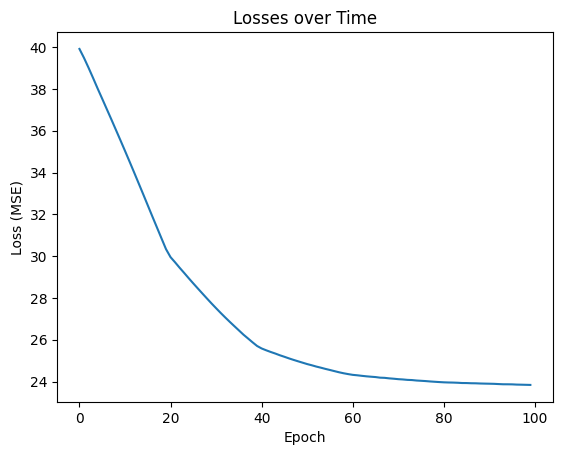

In [132]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    data, targets = data.to(device), targets.to(device)
    loss = criterion(model(data), targets)
    test_loss += loss.item() ** 0.5
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    data, targets = data.to(device), targets.to(device)
    loss = criterion(model(data), targets)
    train_loss += loss.item() ** 0.5
train_loss = train_loss / len(train_loader)

print("Train Loss (in original units):", train_loss)
print("Test Loss (in original units):", test_loss)

plt.plot(avg_losses)
plt.title("Losses over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

In [89]:
spotify_df['popularity'].describe()

count    113549.000000
mean         33.324433
std          22.283855
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

Poor job of predicting -- no better than mean.

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_target_enc,artists_target_enc,explicit_enc,popularity,predicted_popularity
0,-0.182531,-0.801713,0.246650,1.039759,0.245466,0.748811,-0.335326,0.780587,-0.503755,3.823774,0.866666,-1.262497,0.225414,0.983683,0.613257,-0.30251,45.0,34.743469
1,-1.153896,0.494964,0.238694,-0.930096,0.012982,0.748811,-0.469085,0.651188,-0.503750,2.060848,1.746144,1.203250,0.225414,0.496016,0.423640,-0.30251,37.0,30.236824
2,-0.489663,0.039686,1.332504,-1.211504,0.841664,-1.335451,0.918539,-0.949616,-0.431899,0.313806,-0.618418,-0.272638,0.225414,-0.962407,-0.453826,-0.30251,17.0,27.388731
3,0.532040,-1.643113,-1.988699,-0.367280,-2.160372,-1.335451,-0.482557,1.993330,2.354289,-0.580892,-1.038870,0.441346,-2.062984,-0.374213,-0.559937,-0.30251,23.0,35.282578
4,0.578262,-0.940025,1.113742,1.039759,1.089435,0.748811,0.254558,-0.851651,-0.503755,-0.604716,0.380638,1.862487,0.225414,-0.761678,-0.675422,-0.30251,25.0,26.799841
5,-0.753662,1.100080,0.708038,1.039759,0.687204,0.748811,1.457422,-0.633778,-0.503755,-0.804302,1.321834,2.269206,0.225414,0.018907,-0.145209,3.30568,31.0,38.873508
6,-0.403861,0.229865,0.843273,-0.085872,0.723139,-1.335451,-0.426744,-0.929501,-0.503751,0.149689,-0.548985,-0.005563,0.225414,0.986089,1.345568,-0.30251,59.0,24.912054
7,-0.175806,-0.928499,-0.922732,0.476944,0.217274,0.748811,-0.510463,0.082432,-0.503755,-0.083250,-0.934721,-0.074064,-2.062984,0.443435,1.020097,-0.30251,58.0,22.820074
8,-0.426109,0.281732,-0.473276,0.195536,0.378682,0.748811,0.254558,1.244018,-0.503755,-0.692597,0.993958,0.360062,0.225414,-0.511088,-0.223671,-0.30251,29.0,20.651720
9,0.588058,-1.406829,1.300684,-1.211504,0.647299,-1.335451,0.027457,-0.949750,1.972353,0.504392,-1.692307,0.271249,0.225414,-0.096352,0.522406,-0.30251,23.0,29.510908


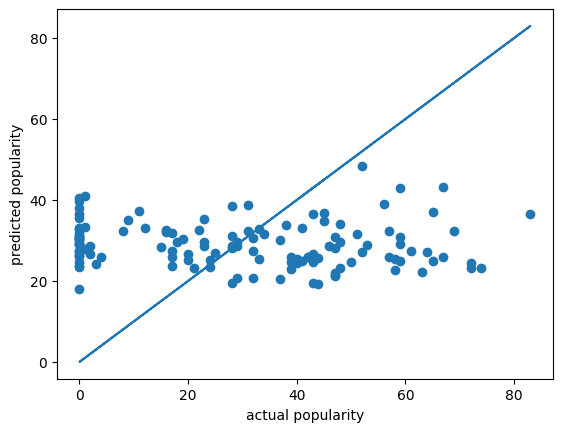

In [131]:
#Visualize the model accuracy with some predictions
sample, target = next(iter(test_loader))
sample = sample.to(device)
preds = model(sample)

sample = sample.cpu().numpy()
target = target.cpu().numpy()
preds = preds.cpu().detach().numpy()

sample_df = pd.DataFrame(sample, columns= X.columns)
target_df = pd.DataFrame(target, columns= ['popularity'])
preds_df = pd.DataFrame(preds, columns= ['predicted_popularity'])

sample_df = sample_df.merge(target_df, left_index=True, right_index=True)
sample_df = sample_df.merge(preds_df, left_index=True, right_index=True)

display(sample_df.head(10))

plt.scatter(target, preds)
plt.xlabel('actual popularity')
plt.ylabel('predicted popularity')
plt.plot(target, target)
plt.show()

You can tell that it's guessing around the mean 33 every time quite consistently.
Next: try to train the model without categorical variables key, mode, time signature.